## dataset

We use fake news dataset from kaggle: <a href='https://www.kaggle.com/competitions/fake-news/'>dataset link</a><br>

Attribute Information<br>
    <pre>1-id     :unique identifier.
2-title  :title of the news.
3-author :author that publish that news.
4-text   :description or text or body of news.
5-label  :class of reliable (`0`), or potentially fake (`1`).</pre>

# <font color="orange">1. Preprocessing</font>

## <font color="orange">1.1 Library</font>

In [1]:
# Reading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Data
import string, re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
E:\anconda\envs\machine\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\anconda\envs\machine\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\anconda\envs\machine\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarnin

## <font color="orange">1.2 Read Data</font>

In [2]:
data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [3]:
#to show the first 5 rows in data
data_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
#to show the first 5 rows in test
data_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [5]:
data_train.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [6]:
#calculate number of rows that contain missing values
mask=data_train.isnull().any(axis=1)
data_train[mask]

,id,title,author,text,label
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
20,20,News: Hope For The GOP: A Nude Paul Ryan Has J...,NaN,Email \nSince Donald Trump entered the electio...,1
23,23,Massachusetts Cop’s Wife Busted for Pinning Fa...,NaN,Massachusetts Cop’s Wife Busted for Pinning Fa...,1
31,31,Israel is Becoming Pivotal to China’s Mid-East...,NaN,Country: Israel While China is silently playin...,1
...,...,...,...,...,...
20745,20745,Thomas Frank Explores Whether Hillary Clinton ...,NaN,Thomas Frank Explores Whether Hillary Clinton ...,1
20768,20768,Osama bin Laden’s older brother rents out luxu...,NaN,Osama bin Laden’s older brother rents out luxu...,1
20771,20771,NaN,Letsbereal,DYN's Statement on Last Week's Botnet Attack h...,1
20772,20772,NaN,beersession,Kinda reminds me of when Carter gave away the ...,1


In [7]:
# ratio of missing data in each row
num_of_rows_with_nan=mask.sum()
numb_of_raws=len(data_train)
raw_ratio=num_of_rows_with_nan/numb_of_raws
raw_ratio

0.12091346153846154

In [8]:
# number of missing value in each column
data_train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
# number of missing value in each column
data_test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [10]:
data_train.shape, data_test.shape

((20800, 5), (5200, 4))

### show relation between train and test  data

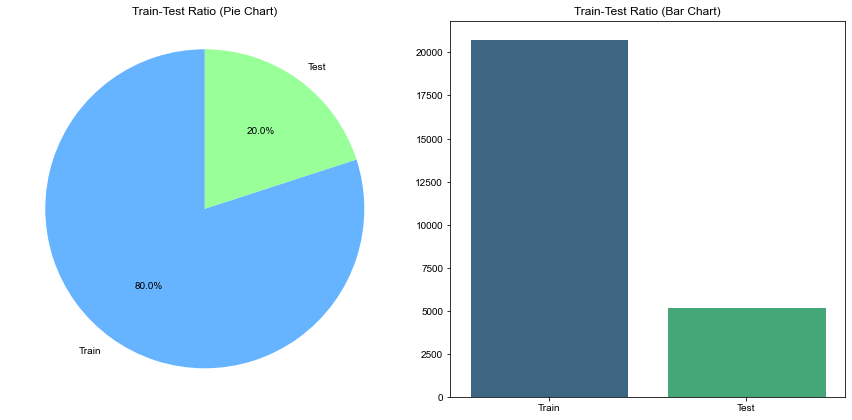

In [11]:
# Assuming you have the lengths of train and test datasets
train_length = len(data_train)
test_length = len(data_test)

# Data preparation
labels = ['Train', 'Test']
sizes = [train_length, test_length]

# Create subplots in a 1x2 grid
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the pie chart
axs[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].set_title('Train-Test Ratio (Pie Chart)')

# Plotting the bar chart
sns.set(style='whitegrid')
sns.barplot(x=labels, y=sizes, palette='viridis', ax=axs[1])
axs[1].set_title('Train-Test Ratio (Bar Chart)')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()


## <font color="orange">1.3 Handle missing value</font>

<h4>1-removing 2-filling(imputation)</h4>

In [12]:
# Drop columns (id,author) in data
new_data_train=data_train.drop(columns=['id','author'])
new_data_train.head()

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1


In [13]:
# drop columns (id,author) in test
new_data_test=data_test.drop(columns=['id','author'])
new_data_test.head()

,title,text
0,"Specter of Trump Loosens Tongues, if Not Purse...","PALO ALTO, Calif. — After years of scorning..."
1,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,#NoDAPL: Native American Leaders Vow to Stay A...,Videos #NoDAPL: Native American Leaders Vow to...
3,"Tim Tebow Will Attempt Another Comeback, This ...","If at first you don’t succeed, try a different..."
4,Keiser Report: Meme Wars (E995),42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [14]:
new_data_train[new_data_train['text'].isnull()]

,title,text,label
142,Gorafi Magazine : Entretien exclusif avec Bara...,NaN,1
573,Le top des recherches Google passe en top des ...,NaN,1
1200,La Corée du Nord annonce avoir envoyé un missi...,NaN,1
1911,Grand-Prix du Brésil – Romain Grosjean obtient...,NaN,1
2148,Gorafi Magazine: Barack Obama « Je vous ai déj...,NaN,1
2169,"#NDDL: Pour fêter l’autorisation des travaux, ...",NaN,1
2793,«Pourquoi je suis candidat à la présidentielle...,NaN,1
3329,GuinessBook : 100 millions d’Américains batten...,NaN,1
3729,Les Américains ne sont plus qu’à quelques heur...,NaN,1
4288,Hillary Clinton en 5 dates >> Le Gorafi,NaN,1


In [15]:
new_data_test[new_data_test['text'].isnull()]

,title,text
589,[Vidéo] Que trouve-t-on dans « Le Gorafi de l’...,NaN
626,Nous avons comparé les programmes d’Alain Jupp...,NaN
978,« J’y crois encore ! » par Alain Juppé en trai...,NaN
2257,Horoscope du 14 novembre 2016 >> Le Gorafi,NaN
2892,Une fan demande le remboursement de son tatoua...,NaN
4736,Révélations – François Fillon serait de droite...,NaN
5092,Des traces de vin rouge détectées dans le Beau...,NaN


### <font color="orange">Drop rows that contain nan values in column named text </font>

In [16]:
new_data_train1 = new_data_train.dropna(subset=['text'])
new_data_train1[new_data_train1['text'].isnull()]
print(f"Before Remove: {len(new_data_train)}, after Remove: {len(new_data_train1)}")
print(new_data_train1.isnull().sum())

Before Remove: 20800, after Remove: 20761
title    558
text       0
label      0
dtype: int64


<font color="red">`!` we need title, so we convert nan title to No Title</font>

In [17]:
new_data_test1=new_data_test.dropna(subset=['text'])
new_data_test1[new_data_test1['text'].isnull()]
print(f"Before Remove: {len(new_data_test)}, after Remove: {len(new_data_test1)}")
print(new_data_test1.isnull().sum())

Before Remove: 5200, after Remove: 5193
title    122
text       0
dtype: int64


In [18]:
def fill_data(data):
    data["title"] = data["title"].fillna("No Title")
    return data

new_data_train2 = fill_data(new_data_train1)
new_data_test2 = fill_data(new_data_test1)

E:\anconda\envs\machine\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
new_data_test2[new_data_test2['title'].isnull()]

,title,text


In [20]:
new_data_train2[new_data_train2['title'].isnull()]

,title,text,label


In [21]:
new_data_train2.head()

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1


In [22]:
new_data_train2.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [23]:
new_data_test2.head()

,title,text
0,"Specter of Trump Loosens Tongues, if Not Purse...","PALO ALTO, Calif. — After years of scorning..."
1,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,#NoDAPL: Native American Leaders Vow to Stay A...,Videos #NoDAPL: Native American Leaders Vow to...
3,"Tim Tebow Will Attempt Another Comeback, This ...","If at first you don’t succeed, try a different..."
4,Keiser Report: Meme Wars (E995),42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [24]:
new_data_test2.isnull().sum()

title    0
text     0
dtype: int64

In [25]:
new_data_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20761 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20761 non-null  object
 1   text    20761 non-null  object
 2   label   20761 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 648.8+ KB


In [26]:
new_data_train2["new_text"] = new_data_train2["title"] + " " + new_data_train2["text"]
new_data_test2["new_text"] = new_data_test2["title"] + " " + new_data_test2["text"]

E:\anconda\envs\machine\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\anconda\envs\machine\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
new_data_train2.head()

,title,text,label,new_text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Why the Trut...
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [28]:
new_data_test2.head()

,title,text,new_text
0,"Specter of Trump Loosens Tongues, if Not Purse...","PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse..."
1,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,#NoDAPL: Native American Leaders Vow to Stay A...,Videos #NoDAPL: Native American Leaders Vow to...,#NoDAPL: Native American Leaders Vow to Stay A...
3,"Tim Tebow Will Attempt Another Comeback, This ...","If at first you don’t succeed, try a different...","Tim Tebow Will Attempt Another Comeback, This ..."
4,Keiser Report: Meme Wars (E995),42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Keiser Report: Meme Wars (E995) 42 mins ago 1 ...


## Make Processing In Text
### Transform Upper Case To lower Case & Remove All Punctiuation(with tokenization) & Remove Stop Words

In [29]:
punc = list(string.punctuation)
stop_words = stopwords.words("english")

def processing_text(data):
    data.lower()

    data = " ".join([word for word in word_tokenize(data) if ((word not in stop_words) and (word not in punc))])

    data = re.sub("[^a-z]", " ", data)

    return data

In [30]:
new_data_train2["Final_text"] = new_data_train2["new_text"].apply(processing_text)
new_data_test2["Final_text"] = new_data_test2["new_text"].apply(processing_text)

E:\anconda\envs\machine\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\anconda\envs\machine\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
new_data_train2.head()

,title,text,label,new_text,Final_text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...,ouse em ide e idn ven ee omey ett...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",illary linton ig oman ampus reitba...
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Why the Trut...,hy ruth ight et ou ired hy ruth ight ...
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...,ivilians illed n ingle irstrike av...
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...,ranian woman jailed fictional unpublished sto...


In [32]:
new_data_test2.head()

,title,text,new_text,Final_text
0,"Specter of Trump Loosens Tongues, if Not Purse...","PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse...",pecter rump oosens ongues ot urse tring...
1,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...,ussian warships ready strike terrorists near ...
2,#NoDAPL: Native American Leaders Vow to Stay A...,Videos #NoDAPL: Native American Leaders Vow to...,#NoDAPL: Native American Leaders Vow to Stay A...,o ative merican eaders ow tay ll i...
3,"Tim Tebow Will Attempt Another Comeback, This ...","If at first you don’t succeed, try a different...","Tim Tebow Will Attempt Another Comeback, This ...",im ebow ill ttempt nother omeback his ...
4,Keiser Report: Meme Wars (E995),42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Keiser Report: Meme Wars (E995) 42 mins ago 1 ...,eiser eport eme ars mins ago ie...


In [33]:
dataOfFinalText=new_data_train2.drop(columns=['title','text','new_text'])
dataOfFinalText.head()

,label,Final_text
0,1,ouse em ide e idn ven ee omey ett...
1,0,illary linton ig oman ampus reitba...
2,1,hy ruth ight et ou ired hy ruth ight ...
3,1,ivilians illed n ingle irstrike av...
4,1,ranian woman jailed fictional unpublished sto...


In [34]:
testOfFinalText=new_data_test2.drop(columns=['title','text','new_text'])
testOfFinalText.head()

,Final_text
0,pecter rump oosens ongues ot urse tring...
1,ussian warships ready strike terrorists near ...
2,o ative merican eaders ow tay ll i...
3,im ebow ill ttempt nother omeback his ...
4,eiser eport eme ars mins ago ie...


### Splitting Data


In [35]:
x=new_data_train2['Final_text']
y=new_data_train2['label']

### Showing sample of data using pandas module


In [36]:
inp_lbl = {'Input': x[0:10], 'Labels': y[0:10]}
df = pd.DataFrame(inp_lbl)
df.style

In [37]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(x)

### Make Tokenization

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
print('*' * 50)
print(f"X_Train Shape: {X_train.shape}")
print(f"y_Train Shape: {y_train.shape}")
print(f"X_Test Shape: {X_test.shape}")
print(f"y_Test Shape: {y_test.shape}")

**************************************************
X_Train Shape: (14532, 151244)
y_Train Shape: (14532,)
X_Test Shape: (6229, 151244)
y_Test Shape: (6229,)


# <font color='orange'> Helper Function </font>

In [39]:
def HelperModelFunction(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_val)
    return train_acc, test_acc

# <font color='orange'> 2. KNN model </font>

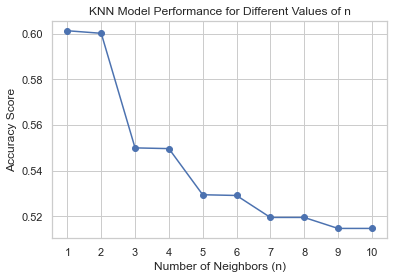

In [40]:
# Vary the number of neighbors (n) and evaluate the performance
neighbors_range = range(1, 11)  # You can adjust this range based on your preferences
accuracy_scores = []

for n in neighbors_range:
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plotting the accuracy scores for different values of n
plt.plot(neighbors_range, accuracy_scores, marker='o')
plt.title('KNN Model Performance for Different Values of n')
plt.xlabel('Number of Neighbors (n)')
plt.ylabel('Accuracy Score')
plt.xticks(neighbors_range)
plt.grid(True)
plt.show()

This Diagram for accuarcy score with different values of N, So best value is  N = 2.

In [41]:
KNN = KNeighborsClassifier(n_neighbors=2)
train_acc, test_acc = HelperModelFunction(KNN, X_train, y_train, X_test, y_test)
print(train_acc)
print(test_acc)

0.9928433801266171
0.6002568630598812


# <font color='orange'> 3. NB model </font>

# <font color='orange'> 3.1 comparing different types of  Naive Bayes </font>

In [42]:
# Storing models in a list to loop through them
models_list = [
    GaussianNB(),
    MultinomialNB(),
    ComplementNB(),
    BernoulliNB(),
]

# for each model
for model in models_list:
    # evaluate the model and calculate acc_train and acc_val
    train_acc, test_acc = HelperModelFunction(
        model,
        X_train,
        y_train,
        X_test,
        y_test
    )
    # Display model name with acc_train and acc_val
    print(model.__class__.__name__)
    print(train_acc, test_acc)
    print('--------------------------')

GaussianNB
0.9966666666666667 0.7756666666666666
--------------------------
MultinomialNB
0.9496666666666667 0.8713333333333333
--------------------------
ComplementNB
0.941 0.853
--------------------------
BernoulliNB
0.8233333333333334 0.7493333333333333
--------------------------


In [43]:
# Storing models in a list to loop through them
models_list = [
    GaussianNB(),
    MultinomialNB(),
    ComplementNB(),
    BernoulliNB(),
]

# creating a dictionary to store results
results_dict = {
    'model_name': [],
    'train_acc': [],
    'test_acc': [],
}

# for each model
for model in models_list:
    # evaluate the model and calculate acc_train and acc_val
    train_acc, test_acc = HelperModelFunction(
        model,
        X_train,
        y_train,
        X_test,
        y_test
    )


    # storing results in results_dict
    results_dict['model_name'].append(model.__class__.__name__)
    results_dict['train_acc'].append(train_acc)
    results_dict['test_acc'].append(test_acc)

# converting results_dict to a DataFrame
results = pd.DataFrame(results_dict)
print(results)


      model_name  train_acc  test_acc
0     GaussianNB   0.996667  0.775667
1  MultinomialNB   0.949667  0.871333
2   ComplementNB   0.941000  0.853000
3    BernoulliNB   0.823333  0.749333


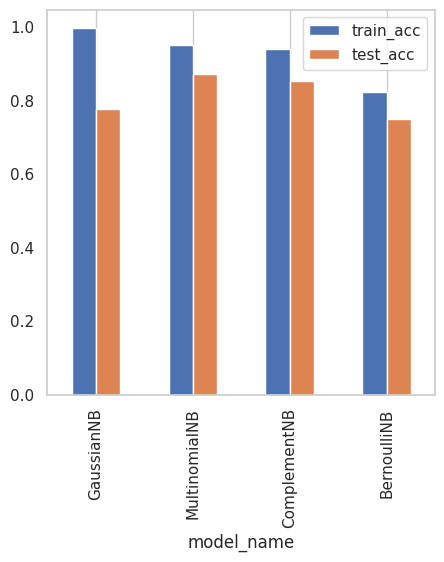

In [44]:
%matplotlib inline
results.plot.bar(x='model_name', y=['train_acc', 'test_acc'], figsize=(5, 5))
plt.grid(axis='y')
plt.show()

 Final model

In [45]:
NB = MultinomialNB()
train_acc, test_acc = HelperModelFunction(NB, X_train, y_train, X_test, y_test)
print(train_acc)
print(test_acc)

0.9121249655931737
0.87381602183336


# <font color='orange'> 4. DT model </font>

In [46]:
max_depth_values = [1,2,3,4,5,6,7,8]
train_accuracy_values = []
val_accuracy_values = []

for max_depth_val in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth_val, random_state=0)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_test, y_pred_val)

    train_accuracy_values.append(acc_train)
    val_accuracy_values.append(acc_val)

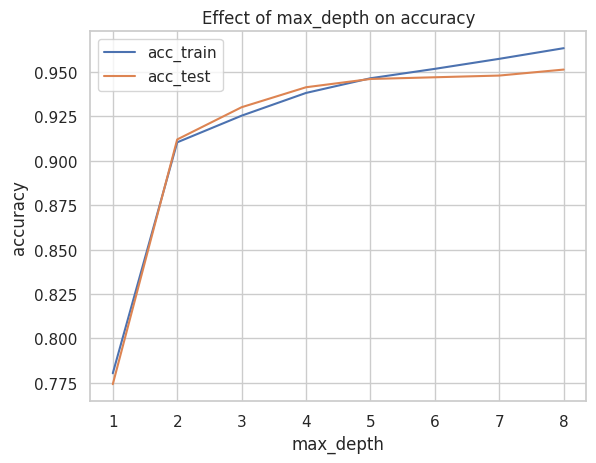

In [47]:
plt.plot(max_depth_values, train_accuracy_values, label='acc_train')
plt.plot(max_depth_values, val_accuracy_values, label='acc_test')
plt.legend()
plt.grid('both')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Effect of max_depth on accuracy')
plt.show()

In [48]:
Best_DT = DecisionTreeClassifier(max_depth= 5 ,random_state=2)
train_acc, test_acc = HelperModelFunction(Best_DT, X_train, y_train, X_test, y_test)

print(train_acc)
print(test_acc)

0.9464629782548858
0.9457376786000963


# <font color='orange'> 5. Logistic Regression model </font>

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

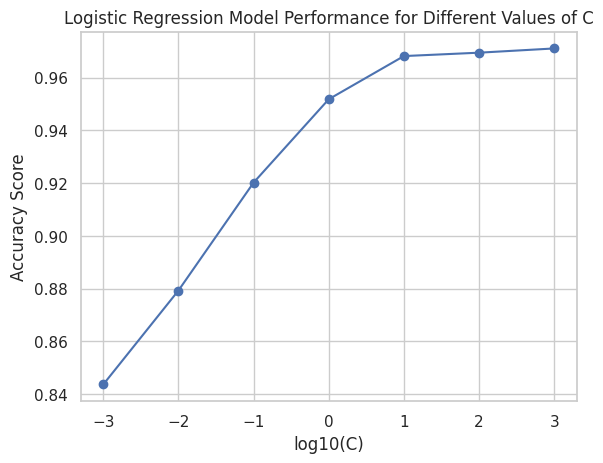

In [49]:
C_values = np.logspace(-3, 3, 7)  # You can adjust this range based on your preferences
accuracy_scores = []

for C in C_values:
    lr_model = LogisticRegression(C=C, random_state=42)
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plotting the accuracy scores for different values of C
plt.plot(np.log10(C_values), accuracy_scores, marker='o')  # Using log scale for better visualization
plt.title('Logistic Regression Model Performance for Different Values of C')
plt.xlabel('log10(C)')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()

This Diagram for accuarcy score with different values of C, So best value is 3.

In [50]:
log_model = LogisticRegression(n_jobs=1, solver='sag', C=3)
train_acc, test_acc = HelperModelFunction(log_model, X_train, y_train, X_test, y_test)
print(train_acc)
print(test_acc)

0.993531516652904
0.9640391716166319
